In [1]:
from langgraph.graph import StateGraph, START, END
from blog_state import BlogState
from generate_outline import generate_outline
from generate_blog import generate_blog
from evaluation import evaluation
from model import load_model


model = load_model()

graph = StateGraph(state_schema=BlogState)

graph.add_node('generate_outline', generate_outline)

graph.add_node('generate_blog', generate_blog)

graph.add_node('evaluation', evaluation)

graph.add_edge(start_key=START, end_key='generate_outline')

graph.add_edge(start_key='generate_outline', end_key='generate_blog')

graph.add_edge(start_key='generate_blog', end_key='evaluation')

graph.add_edge(start_key='evaluation', end_key=END)

workflow = graph.compile()


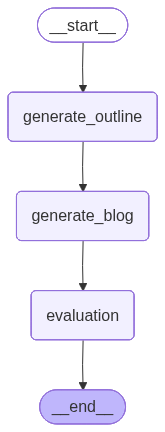

In [2]:
workflow

In [3]:
input_state = {
    'topic':'history of Generative Adversarial Network (GAN)',
    'model':model
}

In [4]:
result = workflow.invoke(input=input_state)

In [5]:
result['topic']

'history of Generative Adversarial Network (GAN)'

In [6]:
result['blog_outline']

'Here is a comprehensive blog outline designed to be engaging, informative, and SEO-friendly. It structures the history of GANs chronologically while highlighting technical milestones and cultural impact.\n\n---\n\n# Blog Title Ideas\n*   **From Noise to Masterpiece: The Evolutionary History of GANs**\n*   **The Adversarial Revolution: A Timeline of Generative Adversarial Networks**\n*   **How GANs Changed AI: From Ian Goodfellow\'s Bar Napkin to Deepfakes**\n*   **The History of Generative Adversarial Networks (2014–Present)**\n\n---\n\n# I. Introduction\n*   **The Hook:** Describe the "Counterfeit Money" analogy (the forger vs. the police) to explain the core concept simply.\n*   **The Context:** Briefly mention the state of AI before 2014 (mostly discriminative models, blurry generative outputs).\n*   **The Thesis:** GANs represent one of the most significant breakthroughs in deep learning, transforming AI from analyzing data to creating it.\n*   **What to Expect:** A journey from t

In [8]:
len(result['blog_complete'])

8986

In [9]:
len(result['blog_outline'])

5892

In [12]:
print(result['evaluation'])

# Rating: 9.5/10

## Short Review

This is an exceptional draft that adheres meticulously to the provided outline while delivering high-quality, engaging content. You have successfully balanced technical accuracy with accessibility, making complex deep learning concepts understandable for a general audience without dumbing them down too much.

**Strengths:**
*   **Narrative Flow:** The "Forger and Police" analogy in the introduction is vivid and sets a perfect foundation for the rest of the post. The storytelling element regarding Ian Goodfellow adds a human touch to the technical history.
*   **Structure & Readability:** The use of H2/H3 headers, bullet points, and bold text makes the content highly skimmable, which is crucial for retaining online readers.
*   **SEO Optimization:** You naturally integrated key terms (Generative Adversarial Networks, Deep Learning, StyleGAN) without keyword stuffing. The inclusion of meta data and URL slug shows a strong understanding of publishing req

In [13]:
len(result['evaluation'])

2063